# Test 9 qubit Shore code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')    # Use dark background for plots

import qibo
assert qibo.__version__ >= "0.2.20", "This script requires qibo version 0.2.20 or higher."
from qibo import Circuit
from qibo.gates import *

from qibo.ui import plot_circuit, plot_density_hist, visualize_state


custom_style = {                    # Define a custom style for the circuit plot
    "facecolor" : "#000000",
    "edgecolor" : "#ffffff",
    "linecolor" : "#ffffff",
    "textcolor" : "#ffffff",
    "fillcolor" : "#c41b1b",
    "gatecolor" : "#9000ff",
    "controlcolor" : "#360000"
}

Codifico il qubit *logico* su 3 qubit fisici:

$\ket{0}_L = \ket{000}$

$\ket{1}_L = \ket{111}$

Stabilizzatori sono osservabili che commutano con lo stato codificato:

$S_1 = Z_1Z_2$

$S_2 = Z_2Z_3$

(<Axes: >, <Figure size 180x300 with 1 Axes>)

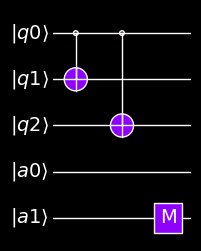

In [2]:
def make_circuit() -> Circuit:
    
    circuit = Circuit(5, wire_names=['q0', 'q1', 'q2', 'a0', 'a1'])
    

    circuit.add(CNOT(0, 1))
    circuit.add(CNOT(0, 2))

    circuit.add(M(4, register_name='ancilla'))

    return circuit


plot_circuit(make_circuit(), style=custom_style)  # Plot the circuit with custom style

## Simulate

In [3]:
circ = make_circuit()

init_state = np.zeros(2**5)

res = circ(nshots=100)

[Qibo 0.2.21|INFO|2025-09-25 20:40:45]: Using qibojit (numba) backend on /CPU:0


In [4]:
print(res.samples(binary=False, registers=True))

print(res.frequencies(binary=True))

{'ancilla': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}
Counter({'0': 100})


(<Axes: xlabel='States', ylabel='Probabilities'>,
 <Figure size 750x500 with 1 Axes>)

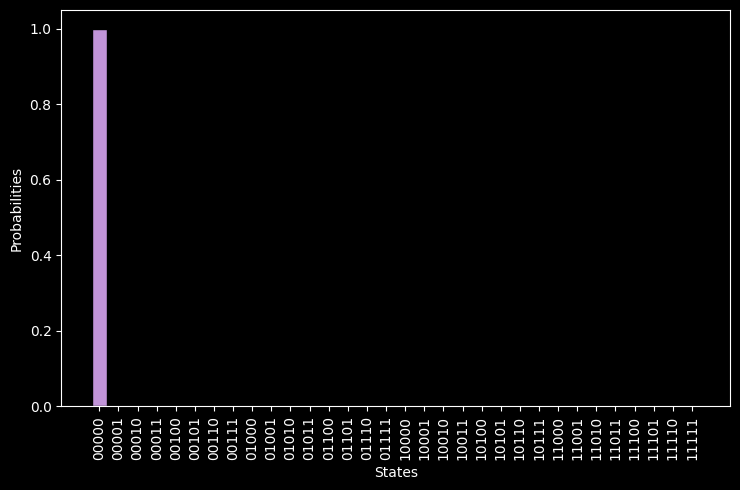

In [5]:
visualize_state(res)